<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-11-04 00:03:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  65.0MB/s    in 3.1s    

2025-11-04 00:03:56 (65.0 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [8]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


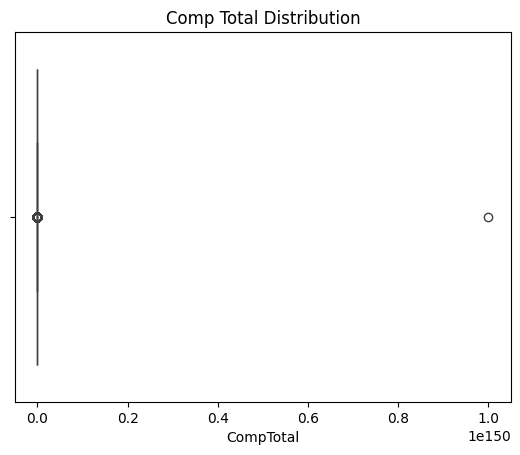

In [10]:
# your code goes here
import seaborn as sns
sns.boxplot(x="CompTotal", data=df)

# Add a title and display the plot
plt.title("Comp Total Distribution")
plt.show()

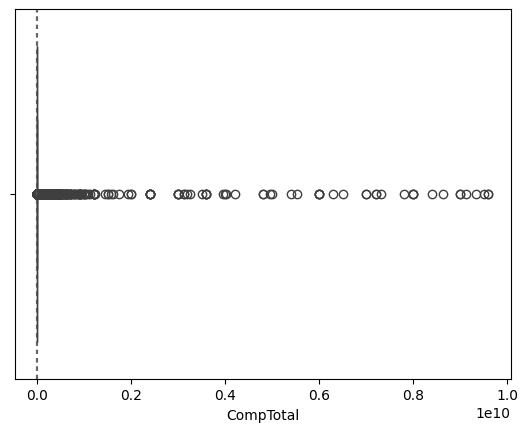

In [23]:
nonadf = df.dropna(subset=['CompTotal'])

compstats = nonadf.CompTotal.describe().reset_index()
compstats.columns = ['stats', 'value']

stdev = compstats.value.loc[compstats.stats == 'std'].values[0]

nonadf = nonadf.loc[nonadf.CompTotal < ((2 * stdev) + nonadf.CompTotal.mean())]
nonadf = nonadf.loc[nonadf.CompTotal < 1e10] # remove outlier

iqr = compstats.value.loc[compstats.stats == '75%'].values[0] - compstats.value.loc[compstats.stats == '25%'].values[0] 
lowerbound = compstats.value.loc[compstats.stats == '25%'].values[0] - (iqr * 1.5) 
upperbound = compstats.value.loc[compstats.stats == '75%'].values[0] + (iqr * 1.5) 

ax = sns.boxplot(x=nonadf["CompTotal"])
ax.axvline(upperbound, color=".3", dashes=(2, 2)) 
ax.axvline(0, color=".4", dashes=(2, 2))

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


/tmp/ipykernel_7999/2106587230.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfage['Age_numeric'] = dfage['Age'].map(convert_age_range)


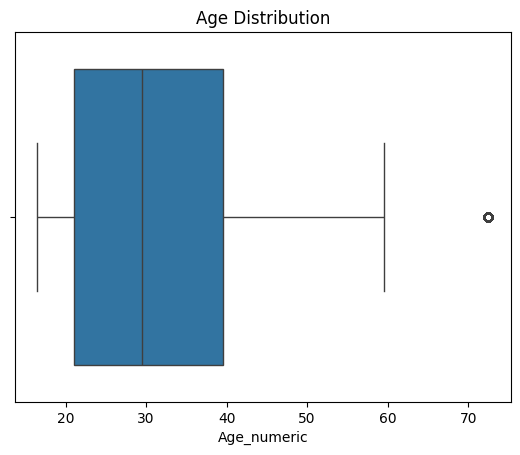

In [13]:
# your code goes here
df['Age'] = df['Age'].replace('Under 18 years old', '15-18 years old')
df['Age'] = df['Age'].replace('65 years or older', '65-80 years old')
dfage = df.loc[df.Age != 'Prefer not to say'] 
dfage.Age.unique() 

##Write your code here
def convert_age_range(age_range):
    ar = age_range.split('y')[0]
    start, end = map(int, ar.split('-'))
    return (start + end) / 2

# Step 2: Apply it to the Age column
dfage['Age_numeric'] = dfage['Age'].map(convert_age_range)


sns.boxplot(x="Age_numeric", data=dfage)

# Add a title and display the plot
plt.title("Age Distribution")
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


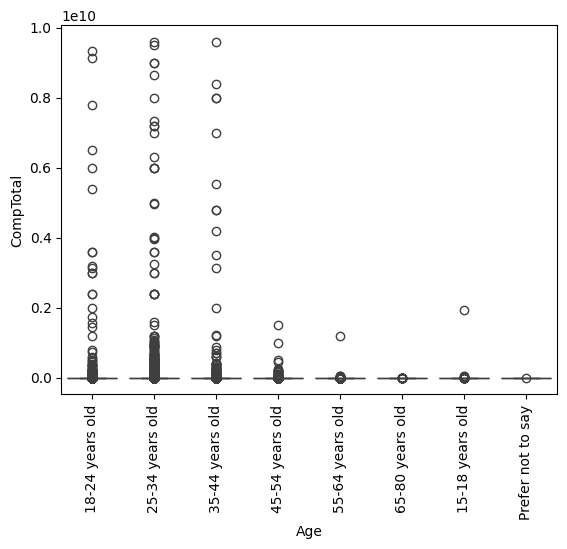

In [28]:
# your code goes here
ax = sns.boxplot(y=nonadf["CompTotal"], x=nonadf.Age)
plt.xticks(rotation=90, ha='center') 
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [38]:
nonadf.JobSatPoints_6 = nonadf.JobSatPoints_6.astype(float)
nonadf.JobSatPoints_6.unique()

array([ 65. ,   0. ,  20. ,  30. ,  25. ,  50. ,  10. ,   5. ,  15. ,
        18. ,  40. ,  35. ,  33. ,  80. , 100. ,   2. ,  90. ,  45. ,
        34. ,  16. ,  70. ,   7. ,  85. ,  60. ,   1. ,   9. ,  14. ,
        31. ,  12. ,  11. ,  23. ,  28. ,  75. ,   8. ,  81. ,   6. ,
        13. ,  55. ,   3. ,  22. ,  42. ,   4. ,  89. ,  99. ,  12.5,
        36. ,  27. ,  17. ,  95. ,  21. ,  24. ,  19. ,  87. ,  29. ,
        33.3,  37. ,  39. ,  77. ,  68. ,  26. ,  32. ,  88. ,  66. ,
        82. ,  94. ,  78. ,  61. ,  43. ,  69. ,  73. ,  17.5,  46. ,
        49. ,  52. ,  97. ,  96. ,  67. ,  91. ,  86. ,  56. ,  98. ,
        41. ,  74. ,  51. ,  76. ,  48. ,  44. ,  64. ,  54. ,  63. ])

In [39]:
# Grouping 'Value' into custom bins
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
nonadf['JobSatPoints_6_Group'] = pd.cut(nonadf['JobSatPoints_6'], bins=bins, labels=labels, right=True)

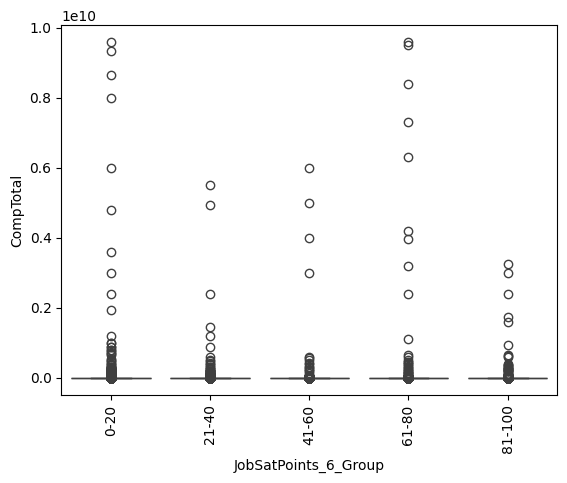

In [40]:
# your code goes here
nonadf.dropna(subset='JobSatPoints_6',inplace=True)
ax = sns.boxplot(y=nonadf["CompTotal"], x=nonadf.JobSatPoints_6_Group)
plt.xticks(rotation=90, ha='center') 
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [50]:
# your code goes here
dev_counts = nonadf.DevType.value_counts().reset_index()
dev_counts

devdf = nonadf.loc[nonadf.DevType.isin(dev_counts.DevType.head(5))]
devdf


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,JobSatPoints_6_Group
398,399,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,10.0,30.0,0.0,0.0,0.0,Appropriate in length,Easy,195000.0,5.0,21-40
415,416,I am a developer by profession,35-44 years old,"Employed, full-time;Independent contractor, fr...",Remote,Apples,Hobby;Contribute to open-source projects;Profe...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,15.0,0.0,0.0,0.0,Too long,Easy,79481.0,3.0,21-40
416,417,I am a developer by profession,35-44 years old,"Employed, full-time;Independent contractor, fr...",Remote,Apples,Contribute to open-source projects;Freelance/c...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,...,15.0,20.0,20.0,15.0,0.0,Too long,Neither easy nor difficult,170000.0,8.0,0-20
423,424,I am a developer by profession,25-34 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,Some college/university study without earning ...,On the job training;Other online resources (e....,Technical documentation;Stack Overflow;How-to ...,...,10.0,10.0,0.0,5.0,5.0,Appropriate in length,Neither easy nor difficult,66592.0,7.0,21-40
424,425,I am a developer by profession,55-64 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,NaN,Neither easy nor difficult,85925.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65153,65154,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time",In-person,Apples,Bootstrapping a business,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Easy,NaN,9.0,81-100
65161,65162,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Colleague;On the job training;Other online res...,Technical documentation;How-to videos;Interact...,...,30.0,20.0,10.0,10.0,5.0,Too long,Easy,NaN,6.0,0-20
65163,65164,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Professional development or self-paced l...,"Associate degree (A.A., A.S., etc.)",On the job training;Other online resources (e....,Technical documentation;Written Tutorials;Stac...,...,40.0,60.0,80.0,90.0,75.0,Appropriate in length,Neither easy nor difficult,NaN,9.0,41-60
65166,65167,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Blogs;Written Tutorials;How-to videos;AI;Audit...,...,30.0,10.0,5.0,10.0,10.0,Appropriate in length,Easy,NaN,8.0,0-20


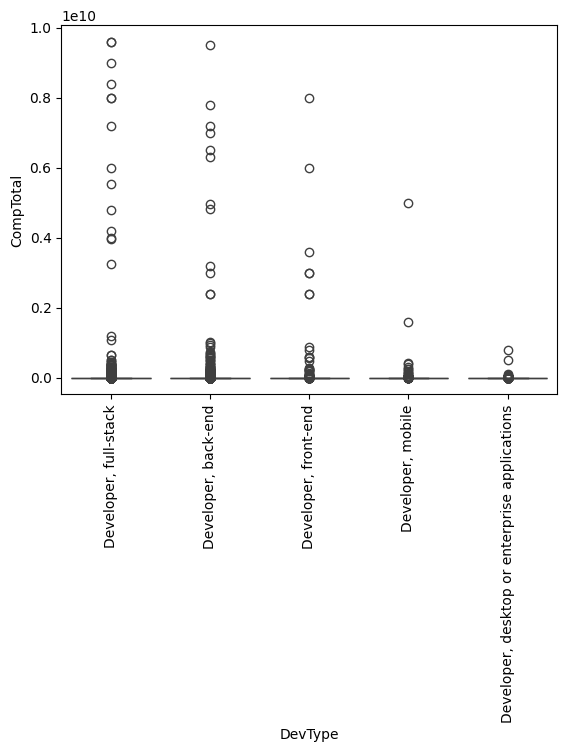

In [51]:
ax = sns.boxplot(y=devdf["CompTotal"], x=devdf.DevType)
plt.xticks(rotation=90, ha='center') 
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [53]:
# your code goes here
country_counts = nonadf.Country.value_counts().reset_index()

countrydf = nonadf.loc[nonadf.Country.isin(country_counts.Country.head(5))]
countrydf

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,JobSatPoints_6_Group
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0,0-20
392,393,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media,NaN,...,5.0,10.0,0.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,161044.0,7.0,21-40
398,399,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,10.0,30.0,0.0,0.0,0.0,Appropriate in length,Easy,195000.0,5.0,21-40
417,418,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby;Contribute to open-source projects;Schoo...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Stack Overflow,...,0.0,0.0,20.0,30.0,0.0,Appropriate in length,Easy,29000.0,10.0,NaN
424,425,I am a developer by profession,55-64 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,NaN,Neither easy nor difficult,85925.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65093,65094,I am a developer by profession,35-44 years old,"Employed, full-time;Independent contractor, fr...",Remote,Apples,Hobby;Contribute to open-source projects;Freel...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,NaN,...,0.0,0.0,0.0,0.0,0.0,Too long,Neither easy nor difficult,NaN,8.0,NaN
65095,65096,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","On the job training;School (i.e., University, ...",NaN,...,10.0,20.0,20.0,10.0,0.0,Appropriate in length,Easy,NaN,10.0,0-20
65105,65106,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Books;Written Tu...,...,10.0,0.0,10.0,10.0,10.0,Appropriate in length,Easy,NaN,8.0,21-40
65132,65133,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Secondary school (e.g. American high school, G...",Books / Physical media;Other online resources ...,Technical documentation;Books;Written Tutorial...,...,8.0,9.0,7.0,9.0,5.0,NaN,Neither easy nor difficult,NaN,8.0,0-20


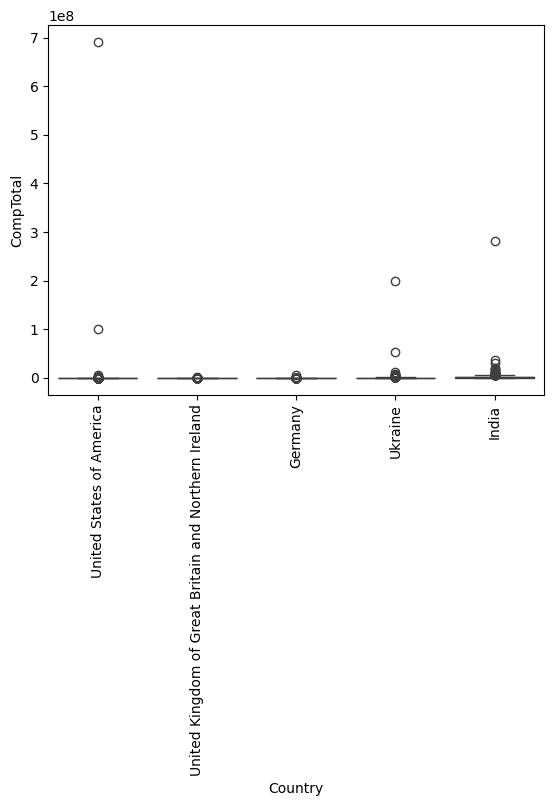

In [54]:
ax = sns.boxplot(y=countrydf["CompTotal"], x=countrydf.Country)
plt.xticks(rotation=90, ha='center') 
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


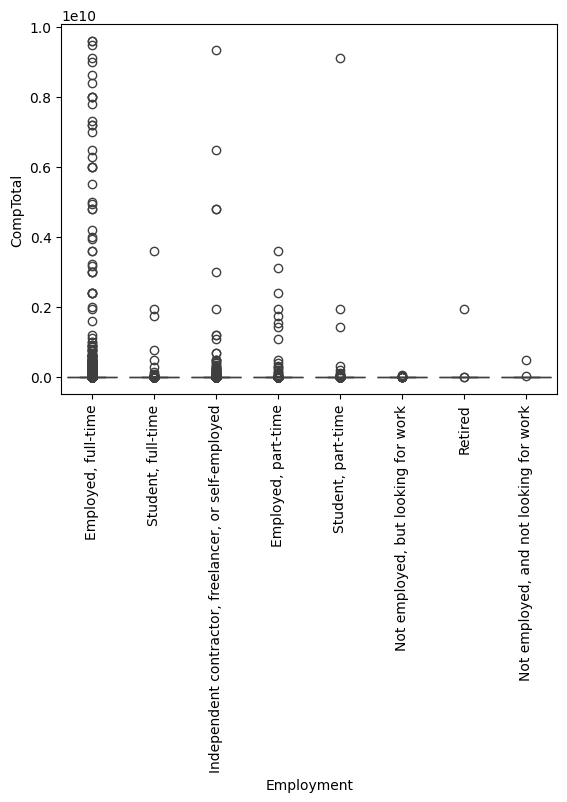

In [55]:
# your code goes here
df_exploded = nonadf.assign(Employment=nonadf['Employment'].str.split(';')).explode('Employment')
df_exploded['Employment'] = df_exploded['Employment'].str.strip()  # Remove extra spaces

# Count duplicates per Employment type
ax = sns.boxplot(y=df_exploded["CompTotal"], x=df_exploded.Employment)
plt.xticks(rotation=90, ha='center') 
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:
# your code goes here
df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'],inplace=True)
df.YearsCodePro.replace('Less than 1 year', '1', inplace=True)
df.YearsCodePro.replace('More than 50 years', '51', inplace=True)
df.YearsCodePro.unique()

df['YearsCodePro'] = df.YearsCodePro.astype(int)

ax = sns.boxplot(y=df["CompTotal"], x=df.YearsCodePro)
plt.xticks(rotation=90, ha='center') 
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
